# LOADING DATASETS

In [6]:
#Kindly Start with loading the provided Cleaned Datasets (Sales and Purchase) into the Colab File

#LOADING SALES DATA

import pandas as pd
path1="/content/Sales_Data.xlsx"
sales = pd.read_excel(path1)
sales.head()

,DATE,PARTICULARS,BUYER,QUANTITY,UNIT,RATE,VALUE,TYPE
0,2024-10-01,Dismantling and shifting charges,Honeywell Automation India Ltd.,9,JOB,343,3087.0,Labor & Miscellaneous Services
1,2024-10-01,Dismantling and shifting charges,Honeywell Automation India Ltd.,14,JOB,1176,16464.0,Labor & Miscellaneous Services
2,2024-10-01,Dismantling and shifting charges,Honeywell Automation India Ltd.,14,JOB,882,12348.0,Labor & Miscellaneous Services
3,2024-10-01,Dismantling and shifting charges,Honeywell Automation India Ltd.,2,JOB,2744,5488.0,Labor & Miscellaneous Services
4,2024-10-01,Dismantling and shifting charges,Honeywell Automation India Ltd.,14,JOB,196,2744.0,Labor & Miscellaneous Services


In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE         249 non-null    datetime64[ns]
 1   PARTICULARS  249 non-null    object        
 2   BUYER        249 non-null    object        
 3   QUANTITY     249 non-null    int64         
 4   UNIT         249 non-null    object        
 5   RATE         249 non-null    object        
 6   VALUE        249 non-null    float64       
 7   TYPE         249 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 15.7+ KB


In [8]:
#LOADING PURCHASE DATA

import pandas as pd
path2="/content/Purchase_Data.xlsx"
purchase = pd.read_excel(path2)
purchase.head()

,Date,Particulars,Supplier,Quantity,UNITS,Rate,Value
0,2024-10-07,Fire Alarm Panel,JP Fire Safety,1,Unit,4700.0,4700.0
1,2024-10-07,Manual Call Point,JP Fire Safety,2,Unit,325.0,650.0
2,2024-10-07,Hooter,JP Fire Safety,2,Unit,700.0,1400.0
3,2024-10-07,Response Indicator,JP Fire Safety,15,Unit,50.0,750.0
4,2024-10-07,Smoke Detector,JP Fire Safety,30,Unit,570.0,17100.0


In [9]:
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         90 non-null     datetime64[ns]
 1   Particulars  90 non-null     object        
 2   Supplier     90 non-null     object        
 3   Quantity     90 non-null     int64         
 4   UNITS        90 non-null     object        
 5   Rate         87 non-null     float64       
 6   Value        90 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 5.1+ KB


# DATA CLEANING

In [10]:
#print(sales.type())
#print(purchase.type())

In [11]:
sales.columns = sales.columns.str.strip()  # Removes leading/trailing spaces
print(sales.columns)

Index(['DATE', 'PARTICULARS', 'BUYER', 'QUANTITY', 'UNIT', 'RATE', 'VALUE',
       'TYPE'],
      dtype='object')


In [12]:
# Convert DATE column to datetime format
sales['DATE'] = pd.to_datetime(sales['DATE'])

# Aggregate sales value per day
daily_sales = sales.groupby('DATE')['VALUE'].sum() #our variable daily_sales is indeed a pandas.Series after this line:

# Fill missing dates with NaN instead of zeros for better analysis
full_date_range = pd.date_range(start=daily_sales.index.min(), end=daily_sales.index.max(), freq='D')
#And even after reindexing and filling missing dates, it's still a Series — just with a datetime index. You confirmed it here:
daily_sales = daily_sales.reindex(full_date_range)
daily_sales.index.name = 'DATE'
#type(daily_sales)

# Replace NaN values with a small constant
daily_sales.fillna(0, inplace=True)

# Verify data
print(daily_sales.head())

DATE
2024-10-01    228837.00
2024-10-02         0.00
2024-10-03     50199.98
2024-10-04    281175.00
2024-10-05         0.00
Freq: D, Name: VALUE, dtype: float64


In [13]:
# Selecting numeric columns only
numeric_cols = sales.select_dtypes(include=["number"])

# Value Feature Summary
value_summary = sales[["VALUE"]].describe().transpose()
value_summary["IQR"] = sales["VALUE"].quantile(0.75) - sales["VALUE"].quantile(0.25)
value_summary["Skewness"] = sales["VALUE"].skew()
value_summary["Kurtosis"] = sales["VALUE"].kurt()

# Quantity/Rate Analysis by Unit Type
grouped_units = sales.groupby("UNIT")[["QUANTITY", "RATE"]].describe().transpose()

# Remove rows with NaN values
grouped_units = grouped_units.dropna()

# Format Value Summary
styled_value = value_summary.style.format(precision=2)\
    .set_caption("📊 <b>Value Analysis</b>")\
    .set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#4CAF50'), ('color', 'white'), ('font-weight', 'bold')]},
        {'selector': 'td', 'props': [('text-align', 'center')]}
    ])

# Format Unit-wise Quantity/Rate Analysis
styled_units = grouped_units.style.format(precision=2)\
    .set_caption("📊 <b>Quantity Analysis by Unit</b>")\
    .set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#2196F3'), ('color', 'white'), ('font-weight', 'bold')]},
        {'selector': 'td', 'props': [('text-align', 'center')]}
    ])

# Display tables
display(styled_value)
display(styled_units)

,count,mean,std,min,25%,50%,75%,max,IQR,Skewness,Kurtosis
VALUE,249.00,40787.36,84175.06,180.00,6900.00,16464.00,41400.00,850000.00,34500.00,6.28,49.85


In [14]:
#Some of the values in the RATE column are likely non-numeric (accidently saved as strings)
sales["RATE"] = pd.to_numeric(sales["RATE"], errors='coerce')

rate_summary = sales[["RATE"]].describe().transpose()
rate_summary["IQR"] = sales["RATE"].quantile(0.75) - sales["RATE"].quantile(0.25)
rate_summary["Skewness"] = sales["RATE"].skew()
rate_summary["Kurtosis"] = sales["RATE"].kurt()

# Format Rate Summary
styled_rate = rate_summary.style.format(precision=2)\
    .set_caption("📊 <b>Rate Analysis</b>")\
    .set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#FF9800'), ('color', 'white'), ('font-weight', 'bold')]},
        {'selector': 'td', 'props': [('text-align', 'center')]},
    ])

# Display table
display(styled_rate)

,count,mean,std,min,25%,50%,75%,max,IQR,Skewness,Kurtosis
RATE,247.00,16809.25,34589.21,9.00,1600.00,3465.00,16000.00,250000.00,14400.00,3.99,18.68


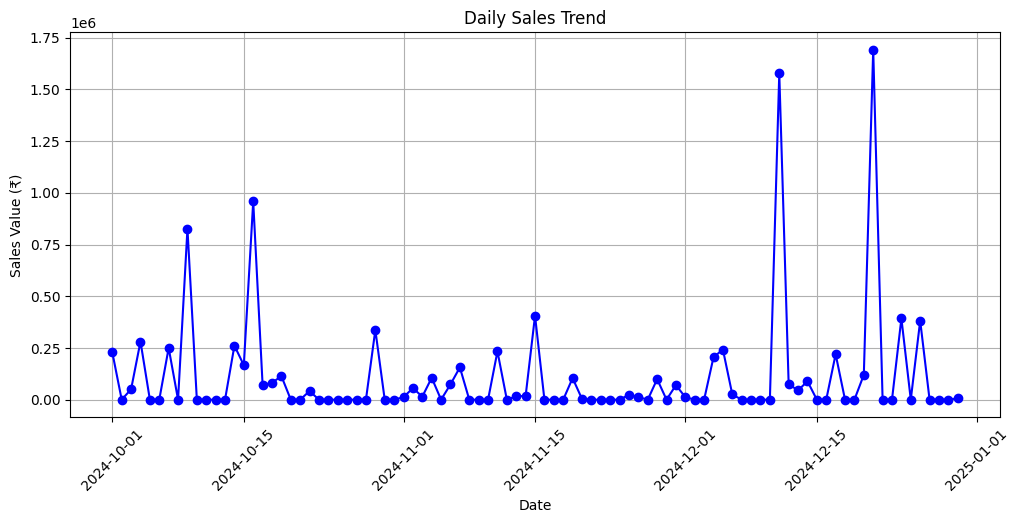

In [15]:
# Plot sales trend
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 5))
plt.plot(daily_sales.index, daily_sales.values, marker='o', linestyle='-', color='b')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales Value (₹)')
plt.grid()
plt.xticks(rotation=45)
plt.show()

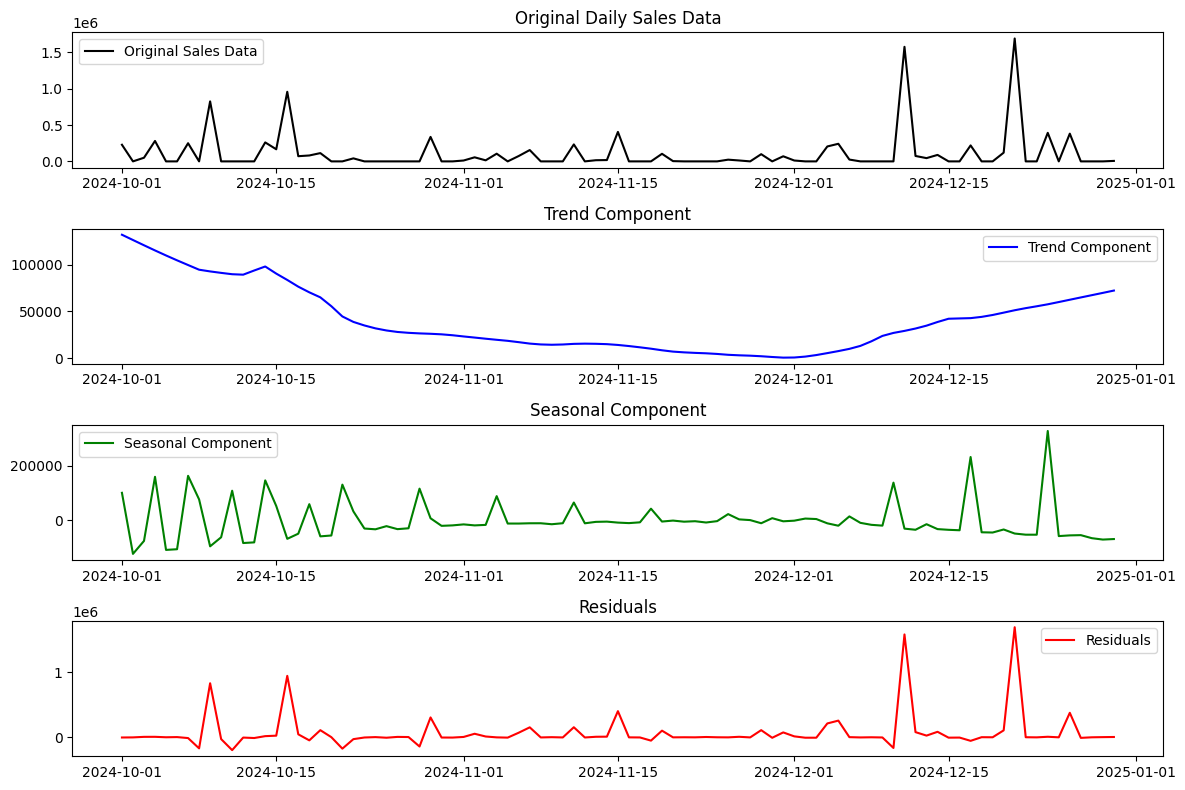

In [16]:
from statsmodels.tsa.seasonal import STL

# Apply STL decomposition
stl = STL(daily_sales, period=7, robust=True)
stl_result = stl.fit()

# Plot components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(daily_sales, label="Original Sales Data", color="black")
plt.legend()
plt.title("Original Daily Sales Data")

plt.subplot(412)
plt.plot(stl_result.trend, label="Trend Component", color="blue")
plt.legend()
plt.title("Trend Component")

plt.subplot(413)
plt.plot(stl_result.seasonal, label="Seasonal Component", color="green")
plt.legend()
plt.title("Seasonal Component")

plt.subplot(414)
plt.plot(stl_result.resid, label="Residuals", color="red")
plt.legend()
plt.title("Residuals")

plt.tight_layout()
plt.show()

<ipython-input-17-1fc83e63b950>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DayOfWeek', y='VALUE', data=daily_sales_df, order=days_order, palette='Set2')


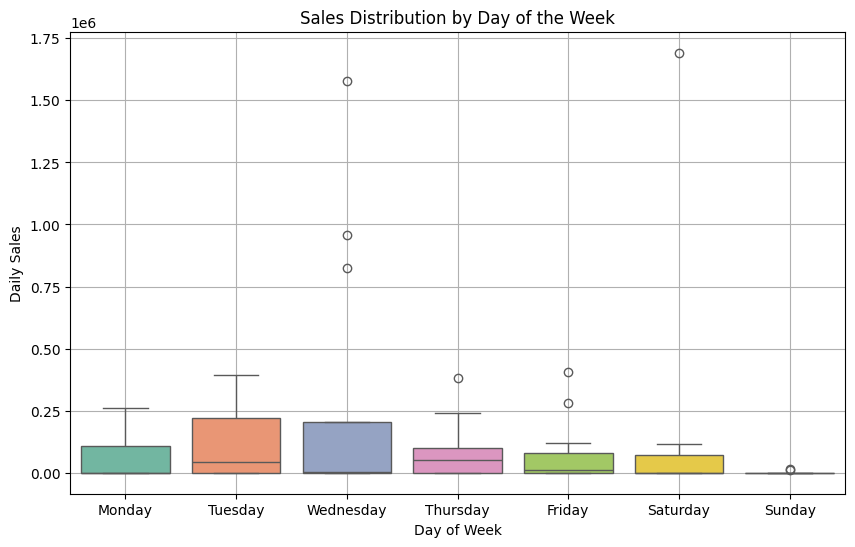

In [17]:
import seaborn as sns
# Convert the Series to DataFrame for plotting
daily_sales_df = daily_sales.reset_index()
daily_sales_df.columns = ['DATE', 'VALUE']

# Extract day of week
daily_sales_df['DayOfWeek'] = daily_sales_df['DATE'].dt.day_name()

# Order the days properly
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='DayOfWeek', y='VALUE', data=daily_sales_df, order=days_order, palette='Set2')
plt.title('Sales Distribution by Day of the Week')
plt.ylabel('Daily Sales')
plt.xlabel('Day of Week')
plt.grid(True)
plt.show()

<Figure size 1000x500 with 0 Axes>

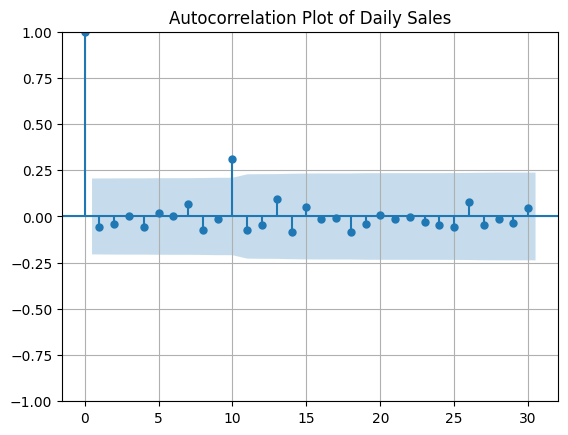

In [18]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot ACF
plt.figure(figsize=(10, 5))
plot_acf(daily_sales, lags=30)  # 30 lags = ~1 month worth of daily data
plt.title('Autocorrelation Plot of Daily Sales')
plt.grid(True)
plt.show()

In [19]:
# CHECK STATIONARITY USING ADF TEST
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    """Perform Augmented Dickey-Fuller test to check stationarity."""
    result = adfuller(series)
    print("ADF Test Results:")
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"P-Value: {result[1]:.4f}")
    print("Stationary" if result[1] < 0.05 else "Non-stationary")

adf_test(daily_sales) # If non-stationary, differencing might be needed

#Low p-value (less than the significance level, e.g., 0.05): Reject the null hypothesis. The time series is likely stationary.
#High p-value (greater than the significance level): Fail to reject the null hypothesis. The time series is likely non-stationary (has a unit root).

ADF Test Results:
ADF Statistic: -9.9501
P-Value: 0.0000
Stationary


In [20]:
from statsmodels.tsa.stattools import kpss

def kpss_test(series, regression='c'):
    """
    Perform KPSS test to check stationarity.
    regression='c' for level stationarity (default),
    regression='ct' for trend stationarity.
    """
    result = kpss(series, regression=regression, nlags='auto')
    print("KPSS Test Results:")
    print(f"KPSS Statistic: {result[0]:.4f}")
    print(f"P-Value: {result[1]:.4f}")
    print(f"Used Lags: {result[2]}")
    for key, value in result[3].items():
        print(f"Critical Value ({key}): {value:.4f}")
    print("=> Non-stationary" if result[1] < 0.05 else "=> Stationary")

kpss_test(daily_sales, regression='c')


#Both tests confirm your series is stationary
#The InterpolationWarning is harmless — it just means your test statistic is so low that the true p-value is even higher than 0.10, which is great!

KPSS Test Results:
KPSS Statistic: 0.1595
P-Value: 0.1000
Used Lags: 2
Critical Value (10%): 0.3470
Critical Value (5%): 0.4630
Critical Value (2.5%): 0.5740
Critical Value (1%): 0.7390
=> Stationary


<ipython-input-20-8518900bfe6e>:9: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression=regression, nlags='auto')


# STEP 2. ARIMA MODEL TRIAL

In [21]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming your data is in a Series named daily_sales
# Make sure index is datetime
daily_sales.index = pd.to_datetime(daily_sales.index)


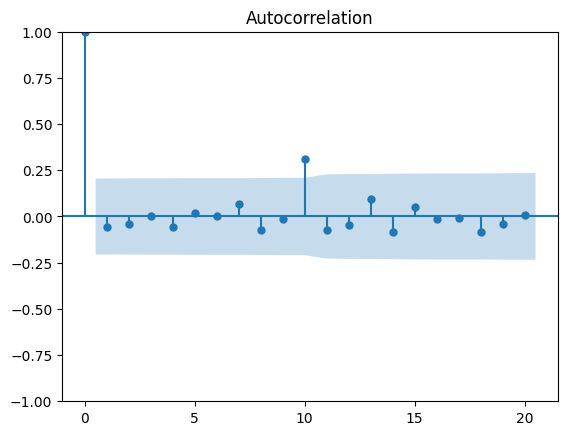

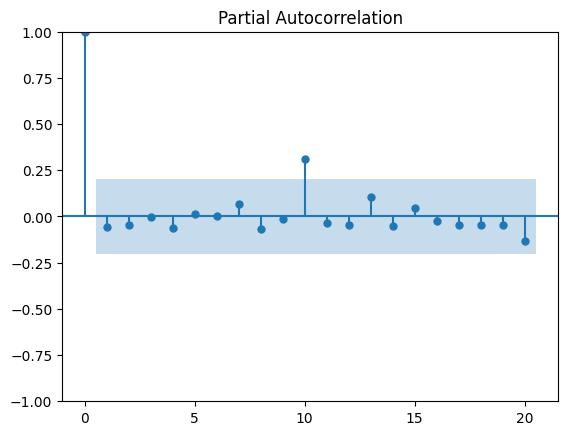

In [22]:
plot_acf(daily_sales)
plot_pacf(daily_sales)
plt.show()

In [23]:
# Fit ARIMA(p, d=0, q)
model1 = ARIMA(daily_sales, order=(1, 0, 0))
model_fit = model1.fit()

# Summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  VALUE   No. Observations:                   91
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1269.612
Date:                Tue, 03 Jun 2025   AIC                           2545.223
Time:                        13:24:10   BIC                           2552.756
Sample:                    10-01-2024   HQIC                          2548.262
                         - 12-30-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.116e+05   3.15e+04      3.545      0.000    4.99e+04    1.73e+05
ar.L1         -0.0581      0.366     -0.159      0.874      -0.775       0.659
sigma2      7.759e+10      0.225   3.45e+11      0.0

In [24]:
predictions = model_fit.fittedvalues

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Actual values
actual = daily_sales[daily_sales.index.isin(predictions.index)]

# RMSE
rmse = np.sqrt(mean_squared_error(actual, predictions))

# MAE
mae = mean_absolute_error(actual, predictions)

# MAPE
#mape = np.mean(np.abs((actual - predictions) / actual)) * 100
non_zero_actual = actual[actual != 0]
non_zero_predictions = predictions[actual != 0]

mape = np.mean(np.abs((non_zero_actual - non_zero_predictions) / non_zero_actual)) * 100

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")

RMSE: 277284.78
MAE: 149566.96
MAPE: 278.84%


In [26]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

orders_to_try = [(1, 1, 0), (0, 1, 1), (1, 1, 1), (2, 1, 1), (2, 1, 2)]

for order in orders_to_try:
    model = ARIMA(daily_sales, order=order)
    fit = model.fit()
    predictions = fit.fittedvalues
    actual = daily_sales[daily_sales.index.isin(predictions.index)]

    # RMSE
    rmse = np.sqrt(mean_squared_error(actual, predictions))

    # MAE
    mae = mean_absolute_error(actual, predictions)

    # MAPE
    non_zero_actual = actual[actual != 0]
    non_zero_predictions = predictions[actual != 0]
    mape = np.mean(np.abs((non_zero_actual - non_zero_predictions) / non_zero_actual)) * 100

    # SMAPE
    smape = 100 * np.mean(2 * np.abs(non_zero_predictions - non_zero_actual) /
                          (np.abs(non_zero_actual) + np.abs(non_zero_predictions)))

    # WAPE
    wape = 100 * np.sum(np.abs(actual - predictions)) / np.sum(np.abs(actual))

    # Output
    print(f"ARIMA{order} -> AIC: {fit.aic:.2f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.2f}%, SMAPE: {smape:.2f}%, WAPE: {wape:.2f}%")

#Select ARIMA(0,1,1) as a base model (lowest AIC and reasonably low RMSE/MAE).

#MAPE > 200% for all models might indicate:

#Extreme outliers

#Highly volatile data

#Improper differencing or trend/seasonality not handled well

#Non-stationary AR warnings: Suggests your time series might still have trend or isn't properly differenced.



ARIMA(1, 1, 0) -> AIC: 2556.97, RMSE: 348388.96, MAE: 187771.97, MAPE: 227.19%, SMAPE: 143.28%, WAPE: 168.25%
ARIMA(0, 1, 1) -> AIC: 2523.59, RMSE: 283139.45, MAE: 151497.60, MAPE: 240.50%, SMAPE: 96.41%, WAPE: 135.74%
ARIMA(1, 1, 1) -> AIC: 2525.32, RMSE: 282750.90, MAE: 150739.88, MAPE: 243.18%, SMAPE: 97.93%, WAPE: 135.07%
ARIMA(2, 1, 1) -> AIC: 2527.09, RMSE: 282539.33, MAE: 148950.37, MAPE: 242.01%, SMAPE: 94.74%, WAPE: 133.46%
ARIMA(2, 1, 2) -> AIC: 2526.55, RMSE: 282409.94, MAE: 151084.93, MAPE: 249.34%, SMAPE: 97.97%, WAPE: 135.37%


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


# STEP 3. SARIMA MODEL TRIAL

In [27]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assume daily_sales is your time series data
model = SARIMAX(daily_sales,
                order=(1, 0, 0),               # Non-seasonal (p=1, d=0, q=0)
                seasonal_order=(1, 1, 1, 7))    # Seasonal (P=1, D=1, Q=1, m=7)
#model_fit = model.fit(disp=False)
#print(model_fit.summary())

In [28]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Define SARIMA orders to try based on promising ARIMA models and assuming weekly seasonality (7-day period)
sarima_orders_to_try = [
    ((0, 1, 1), (1, 1, 1, 7)),
    ((1, 1, 0), (1, 1, 1, 7)),
    ((1, 1, 1), (1, 1, 1, 7)),
    ((2, 1, 1), (1, 1, 1, 7)),
    ((2, 1, 2), (1, 1, 1, 7)),
]

for order, seasonal_order in sarima_orders_to_try:
    try:
        model = SARIMAX(daily_sales, order=order, seasonal_order=seasonal_order,
                        enforce_stationarity=False, enforce_invertibility=False)
        fit = model.fit(disp=False)
        predictions = fit.fittedvalues
        actual = daily_sales[daily_sales.index.isin(predictions.index)]

        # RMSE
        rmse = np.sqrt(mean_squared_error(actual, predictions))

        # MAE
        mae = mean_absolute_error(actual, predictions)

        # MAPE
        non_zero_actual = actual[actual != 0]
        non_zero_predictions = predictions[actual != 0]
        mape = np.mean(np.abs((non_zero_actual - non_zero_predictions) / non_zero_actual)) * 100

        # SMAPE
        smape = 100 * np.mean(2 * np.abs(non_zero_predictions - non_zero_actual) /
                              (np.abs(non_zero_actual) + np.abs(non_zero_predictions)))

        # WAPE
        wape = 100 * np.sum(np.abs(actual - predictions)) / np.sum(np.abs(actual))

        # Output
        print(f"SARIMA{order}x{seasonal_order} -> AIC: {fit.aic:.2f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.2f}%, SMAPE: {smape:.2f}%, WAPE: {wape:.2f}%")
    except Exception as e:
        print(f"SARIMA{order}x{seasonal_order} failed: {e}")

SARIMA(0, 1, 1)x(1, 1, 1, 7) -> AIC: 2103.78, RMSE: 305401.83, MAE: 200372.52, MAPE: 428.98%, SMAPE: 101.79%, WAPE: 179.54%
SARIMA(1, 1, 0)x(1, 1, 1, 7) -> AIC: 2148.42, RMSE: 346001.44, MAE: 197541.71, MAPE: 290.92%, SMAPE: 130.04%, WAPE: 177.00%
SARIMA(1, 1, 1)x(1, 1, 1, 7) -> AIC: 2105.25, RMSE: 303011.67, MAE: 197248.12, MAPE: 427.29%, SMAPE: 100.37%, WAPE: 176.74%
SARIMA(2, 1, 1)x(1, 1, 1, 7) -> AIC: 2105.50, RMSE: 302118.36, MAE: 195605.04, MAPE: 429.18%, SMAPE: 101.96%, WAPE: 175.27%
SARIMA(2, 1, 2)x(1, 1, 1, 7) -> AIC: 2078.14, RMSE: 300166.23, MAE: 191313.25, MAPE: 414.64%, SMAPE: 99.78%, WAPE: 171.42%


In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

# Log-transform the series to stabilize variance
log_sales = np.log1p(daily_sales)

# Define SARIMA configs to try (with variations)
sarima_orders_to_try = [
    ((2, 1, 2), (1, 0, 1, 7)),   # promising
    ((1, 1, 1), (1, 0, 1, 7)),   # simpler
    ((1, 1, 2), (1, 0, 1, 7)),   # more flexible MA component
]

for order, seasonal_order in sarima_orders_to_try:
    try:
        model = SARIMAX(log_sales, order=order, seasonal_order=seasonal_order,
                        enforce_stationarity=False, enforce_invertibility=False)
        fit = model.fit(disp=False)

        # Predict and invert log transformation
        log_predictions = fit.fittedvalues
        predictions = np.expm1(log_predictions)

        # Align with original data
        actual = daily_sales[daily_sales.index.isin(predictions.index)]

        # Metrics
        rmse = np.sqrt(mean_squared_error(actual, predictions))
        mae = mean_absolute_error(actual, predictions)

        # Avoid division by zero
        non_zero_actual = actual[actual != 0]
        non_zero_predictions = predictions[actual != 0]

        mape = np.mean(np.abs((non_zero_actual - non_zero_predictions) / non_zero_actual)) * 100
        smape = 100 * np.mean(2 * np.abs(non_zero_predictions - non_zero_actual) /
                              (np.abs(non_zero_actual) + np.abs(non_zero_predictions)))
        wape = 100 * np.sum(np.abs(actual - predictions)) / np.sum(np.abs(actual))

        print(f"SARIMA{order}x{seasonal_order} -> AIC: {fit.aic:.2f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}, "
              f"MAPE: {mape:.2f}%, SMAPE: {smape:.2f}%, WAPE: {wape:.2f}%")

    except Exception as e:
        print(f"SARIMA{order}x{seasonal_order} failed: {e}")

#SARIMA(1, 1, 2)x(1, 0, 1, 7)

SARIMA(2, 1, 2)x(1, 0, 1, 7) -> AIC: 522.63, RMSE: 300254.56, MAE: 115645.55, MAPE: 98.84%, SMAPE: 195.67%, WAPE: 103.62%
SARIMA(1, 1, 1)x(1, 0, 1, 7) -> AIC: 525.81, RMSE: 1398200.33, MAE: 278794.57, MAPE: 97.37%, SMAPE: 191.63%, WAPE: 249.80%
SARIMA(1, 1, 2)x(1, 0, 1, 7) -> AIC: 520.94, RMSE: 299649.26, MAE: 113641.08, MAPE: 98.94%, SMAPE: 195.96%, WAPE: 101.82%


Best SARIMA(1,1,2)x(1,0,1,7) -> AIC: 2247.06, RMSE: 279418.33, MAE: 162071.82, MAPE: 312.88%, SMAPE: 96.09%, WAPE: 145.22%


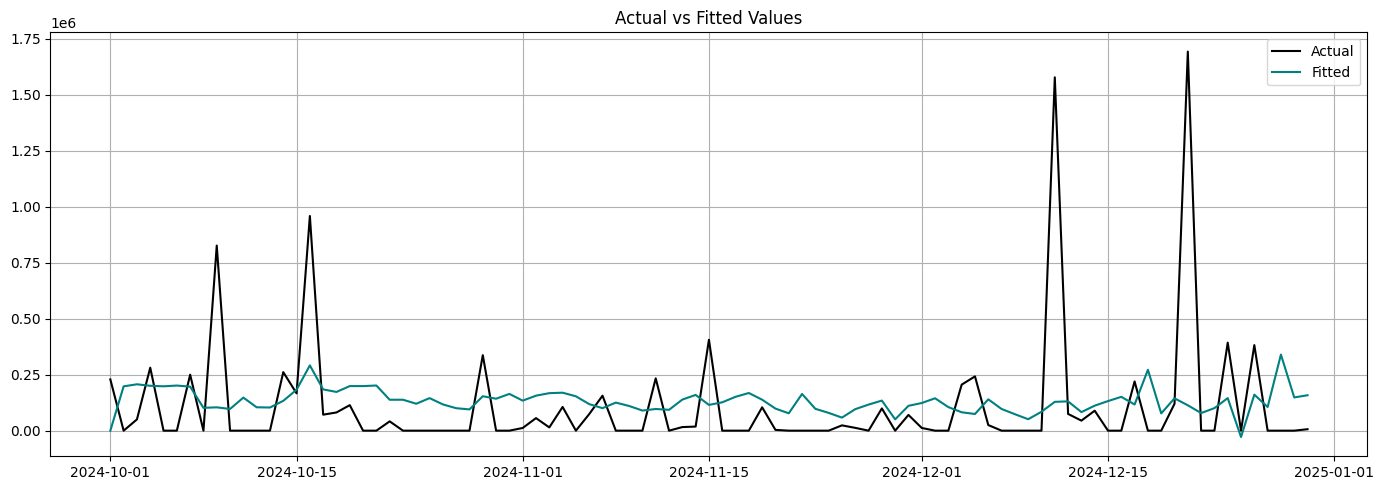

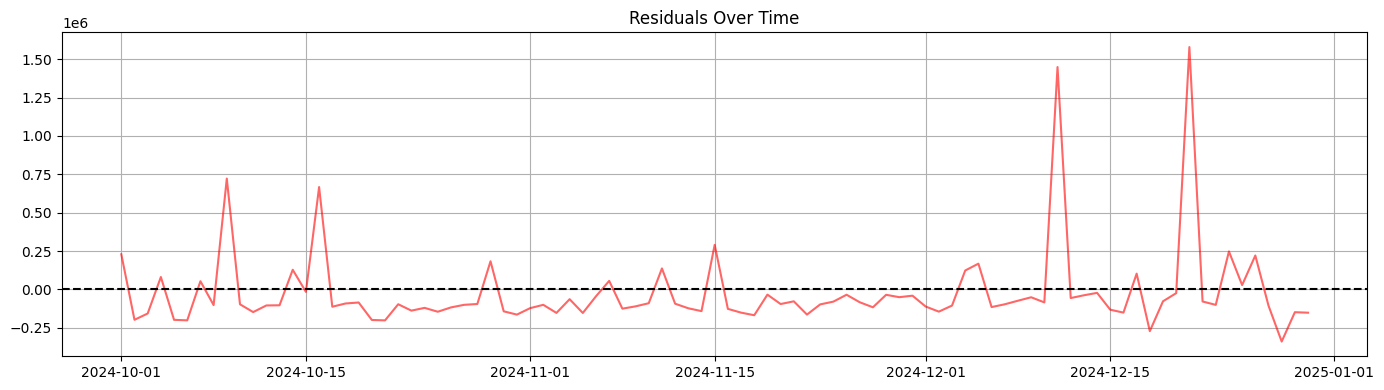

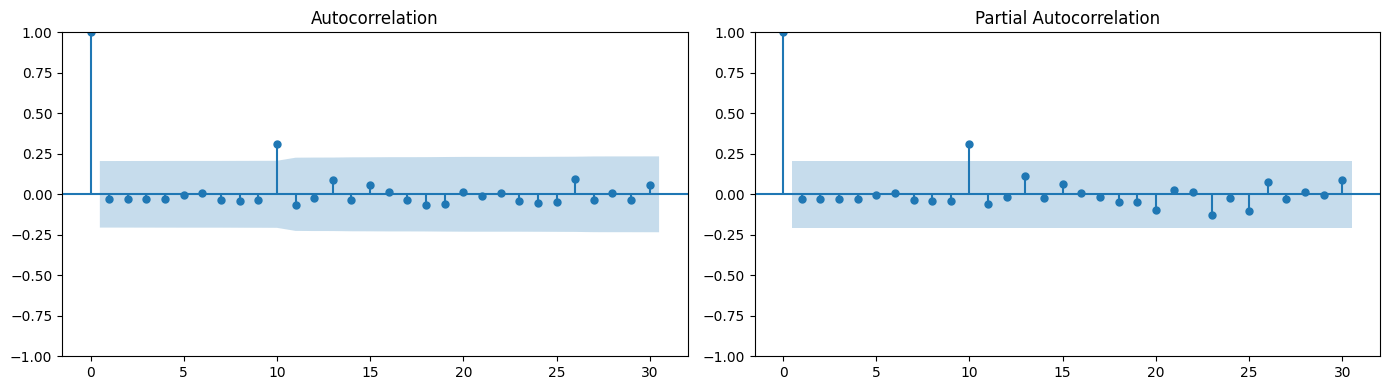

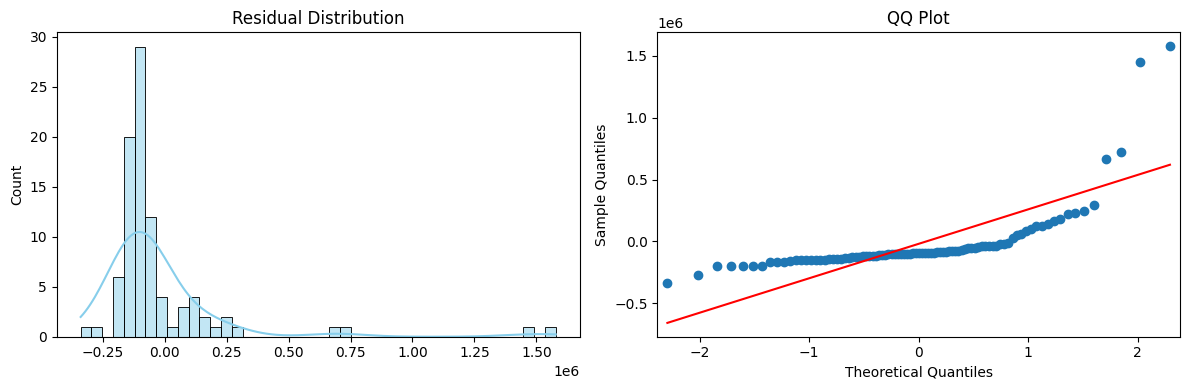

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm

# Fit the best SARIMA model
order = (1, 1, 2)
seasonal_order = (1, 0, 1, 7)
model = SARIMAX(daily_sales, order=order, seasonal_order=seasonal_order,
                enforce_stationarity=False, enforce_invertibility=False)
fit = model.fit(disp=False)

# Fitted values
predictions = fit.fittedvalues
actual = daily_sales[daily_sales.index.isin(predictions.index)]

# Evaluation Metrics
rmse = np.sqrt(mean_squared_error(actual, predictions))
mae = mean_absolute_error(actual, predictions)
non_zero_actual = actual[actual != 0]
non_zero_predictions = predictions[actual != 0]
mape = np.mean(np.abs((non_zero_actual - non_zero_predictions) / non_zero_actual)) * 100
smape = 100 * np.mean(2 * np.abs(non_zero_predictions - non_zero_actual) /
                      (np.abs(non_zero_actual) + np.abs(non_zero_predictions)))
wape = 100 * np.sum(np.abs(actual - predictions)) / np.sum(np.abs(actual))

print(f"Best SARIMA(1,1,2)x(1,0,1,7) -> AIC: {fit.aic:.2f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}, "
      f"MAPE: {mape:.2f}%, SMAPE: {smape:.2f}%, WAPE: {wape:.2f}%")

# Actual vs Predicted
# ------------------------------
plt.figure(figsize=(14, 5))
plt.plot(actual, label='Actual', color='black')
plt.plot(predictions, label='Fitted', color='teal')
plt.title('Actual vs Fitted Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Residual Plot
# ------------------------------
residuals = fit.resid

plt.figure(figsize=(14, 4))
plt.plot(residuals, color='red', alpha=0.6)
plt.title("Residuals Over Time")
plt.axhline(0, linestyle='--', color='black')
plt.grid(True)
plt.tight_layout()
plt.show()

# ACF & PACF of Residuals
# ------------------------------
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
sm.graphics.tsa.plot_acf(residuals.dropna(), lags=30, ax=ax[0])
sm.graphics.tsa.plot_pacf(residuals.dropna(), lags=30, ax=ax[1])
plt.tight_layout()
plt.show()

# Histogram & QQ Plot of Residuals
# ------------------------------
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(residuals.dropna(), kde=True, ax=ax[0], color='skyblue')
ax[0].set_title("Residual Distribution")
sm.qqplot(residuals.dropna(), line='s', ax=ax[1])
ax[1].set_title("QQ Plot")
plt.tight_layout()
plt.show()


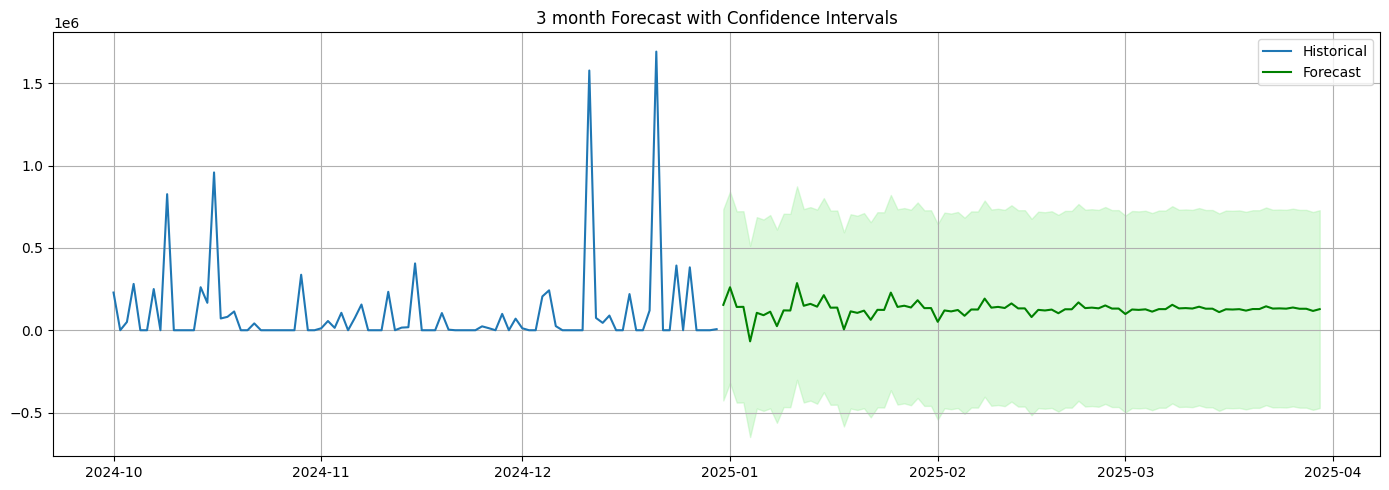

In [31]:
# Forecast Future Demand
n_steps = 90
forecast = fit.get_forecast(steps=n_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

plt.figure(figsize=(14, 5))
plt.plot(daily_sales, label='Historical')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='green')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='lightgreen', alpha=0.3)
plt.title('3 month Forecast with Confidence Intervals')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()